# Amazon Prime Video Dataset

cvt_per_day is cumulated view time per day

weighted_categorical_position is average vertical position of the movie title on the home page 

weighted_horizontal_position is average horizontal position of the movie title on the home page 


# Import Libraries

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Load Data, Descriptive Statistics 

In [15]:
AmazonPV_raw =  pd.read_csv("AmazonPrimeVideoData.txt")

print(AmazonPV_raw.describe())
print(AmazonPV_raw.info())
AmazonPV_raw.head()

            video_id    cvt_per_day  weighted_categorical_position  \
count    4226.000000    4226.000000                    4226.000000   
mean   280371.162565    4218.630239                       7.782537   
std    112640.127822   13036.079964                       6.134183   
min      7909.000000       2.187625                       1.000000   
25%    285104.250000     351.168776                       4.000000   
50%    313891.500000    1193.499989                       6.000000   
75%    349345.750000    3356.788816                       9.000000   
max    394880.000000  307127.605608                      41.000000   

       weighted_horizontal_position  release_year     imdb_votes  \
count                   4226.000000   4226.000000    4226.000000   
mean                      28.103644   2001.056791    6462.924042   
std                       11.863649     17.496849   31596.006790   
min                        1.000000   1916.000000       0.000000   
25%                       20.

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_position,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


# Exploratory Analysis
#Histograms

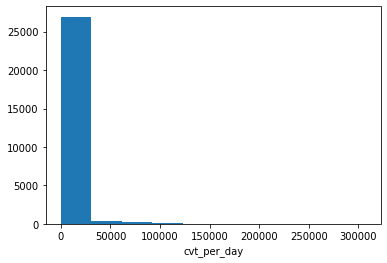

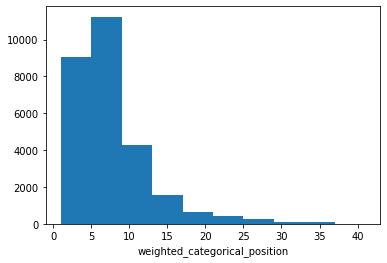

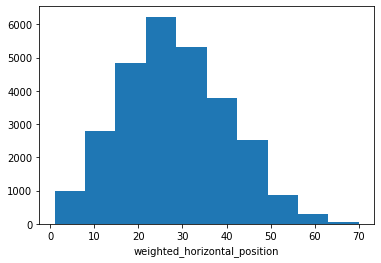

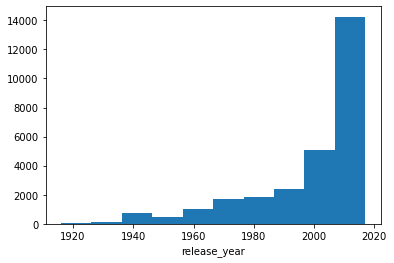

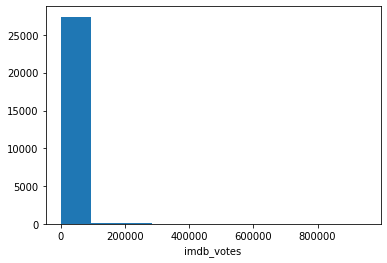

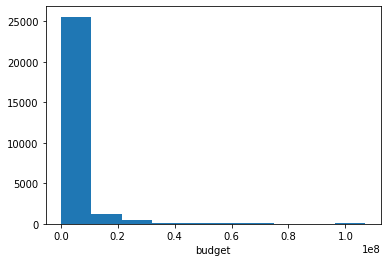

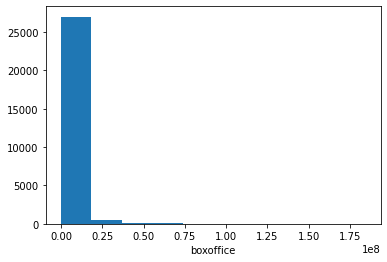

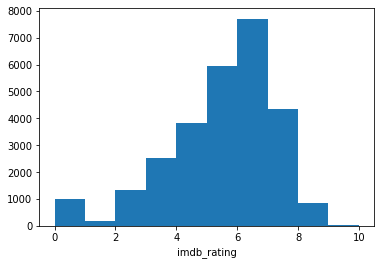

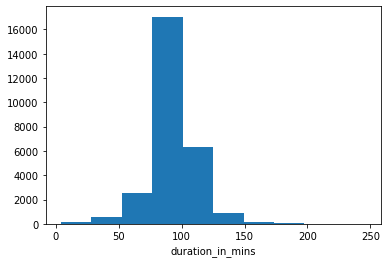

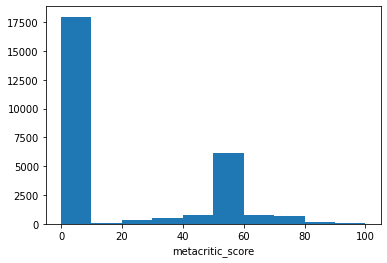

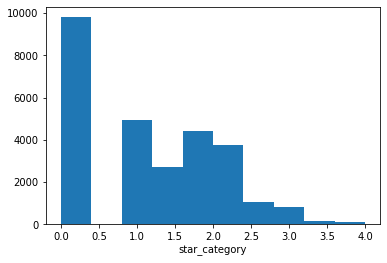

In [64]:
variables = ['cvt_per_day','weighted_categorical_position','weighted_horizontal_position','release_year','imdb_votes','budget','boxoffice','imdb_rating','duration_in_mins','metacritic_score','star_category']
for v in variables:
    plt.hist(AmazonPV_raw[v])
    plt.xlabel(v)
    plt.show()

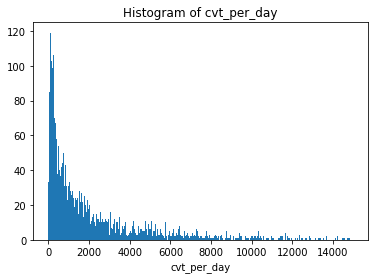

In [22]:
#More granular histogram
plt.hist(AmazonPV_raw['cvt_per_day'], bins=range(0,15000,30))
plt.title('Histogram of cvt_per_day')
plt.xlabel('cvt_per_day')
plt.show()

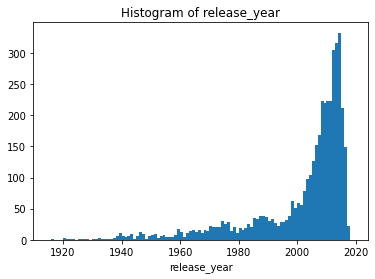

In [16]:
#More granular histogram
plt.hist(AmazonPV_raw['release_year'], bins=range(1915, 2020))
plt.title('Histogram of release_year')
plt.xlabel('release_year')
plt.show()

# Boxplots

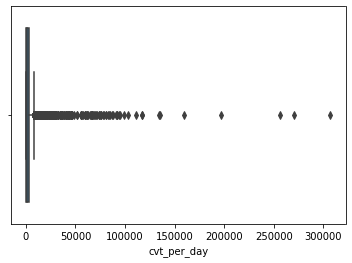

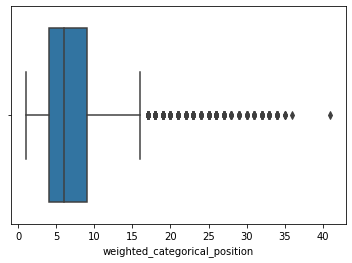

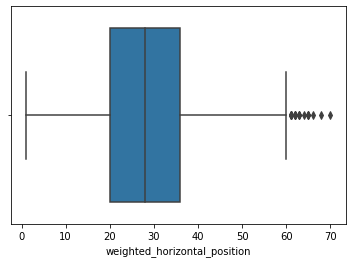

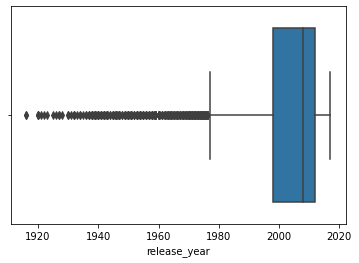

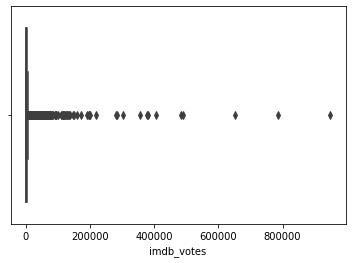

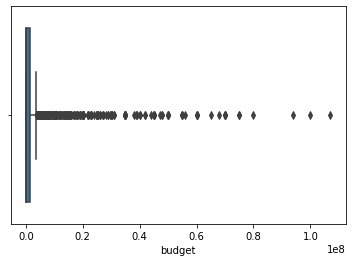

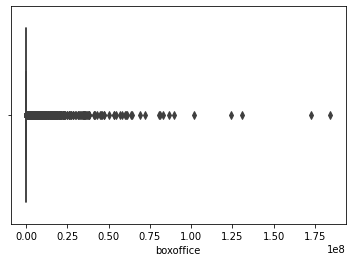

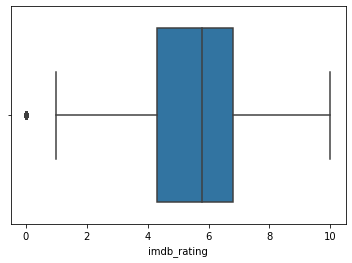

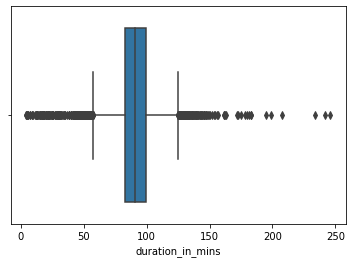

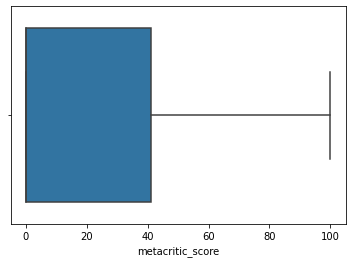

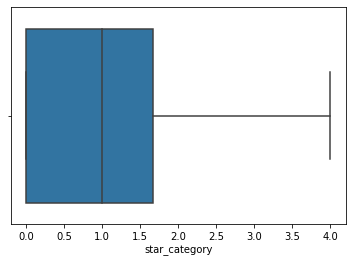

In [34]:
variables = ['cvt_per_day','weighted_categorical_position','weighted_horizontal_position','release_year','imdb_votes','budget','boxoffice','imdb_rating','duration_in_mins','metacritic_score','star_category']
for v in variables:
    sns.boxplot(AmazonPV_raw[v])
    plt.show()

In [29]:
#Violinplots
#variables = ['cvt_per_day','weighted_categorical_position','weighted_horizontal_position','release_year','imdb_votes','budget','boxoffice','imdb_rating','duration_in_mins','metacritic_score','star_category']
#for v in variables:
    #sns.violinplot(AmazonPV_raw[v])
   #plt.show()

# Correlation Heatmap

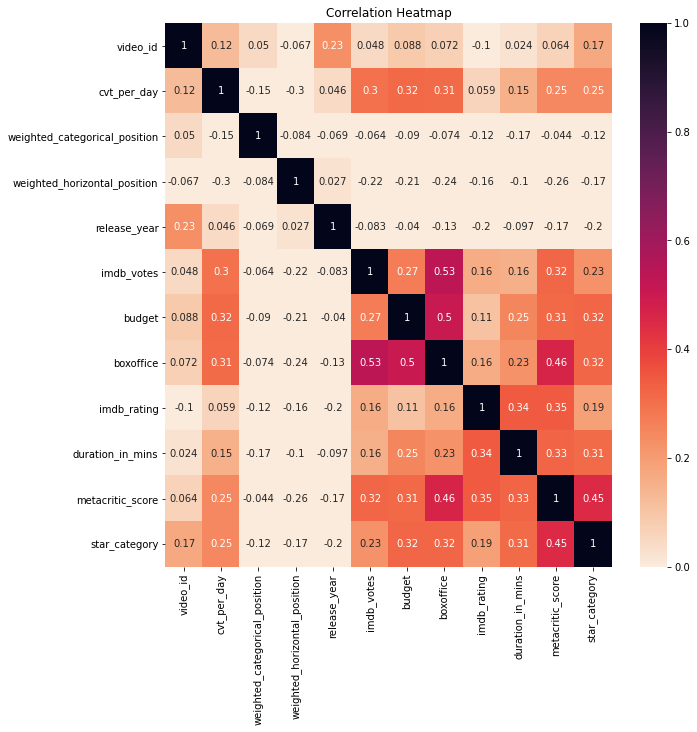

In [25]:
AmazonPV_corr = AmazonPV_raw.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(AmazonPV_corr, cmap="rocket_r", annot=True, vmin=0, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**#INSIGHTS:**

**1) box office is correlated with imdb_votes, budget and metacritic_score**

**2) cvt_per_day is correlated with imdb_votes, budget and boxoffice**



# Distribution of Categorical Variables


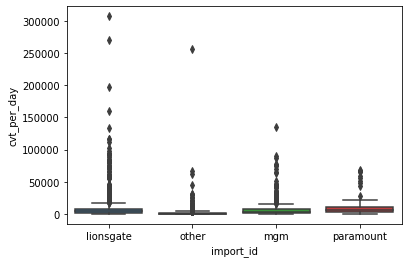

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


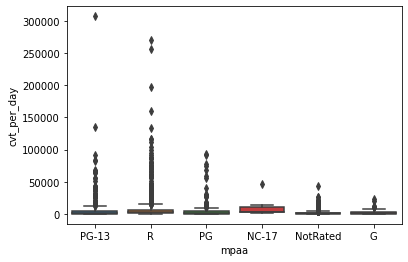

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


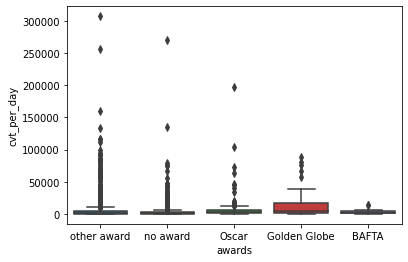

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [16]:
sns.boxplot(x='import_id', y='cvt_per_day', data=AmazonPV_raw)
plt.show()
print(AmazonPV_raw['import_id'].value_counts())

sns.boxplot(x='mpaa', y='cvt_per_day', data=AmazonPV_raw)
plt.show()
print(AmazonPV_raw['mpaa'].value_counts())

sns.boxplot(x='awards', y='cvt_per_day', data=AmazonPV_raw)
plt.show()
print(AmazonPV_raw['awards'].value_counts())

# Scatterplots

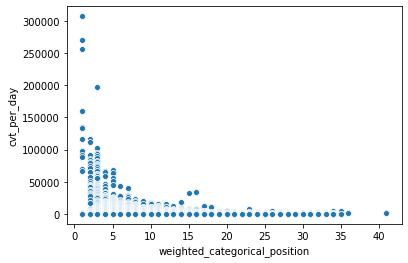

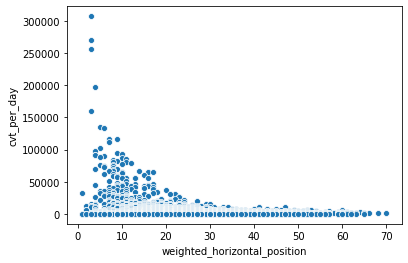

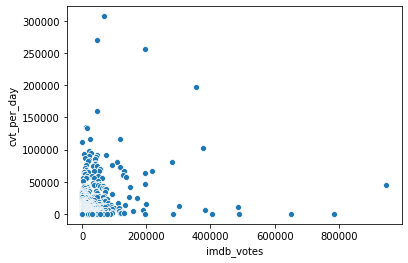

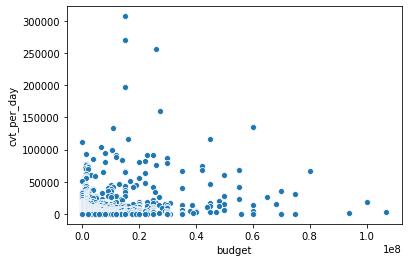

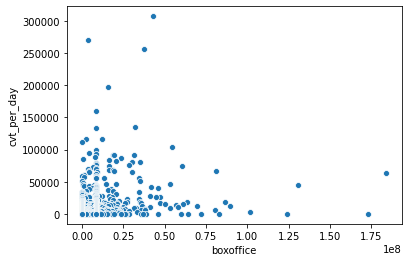

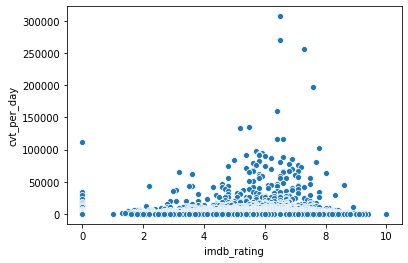

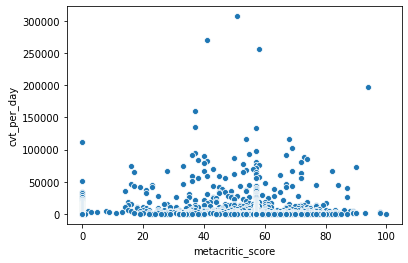

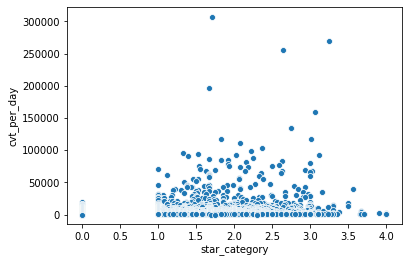

In [89]:
#Scatterpolot of Views vs. Numeric variables
variables = ['weighted_categorical_position','weighted_horizontal_position','imdb_votes','budget','boxoffice','imdb_rating','metacritic_score','star_category']
for v in variables:
    sns.scatterplot(x=v, y='cvt_per_day', data=AmazonPV_raw) 
    plt.show()
    

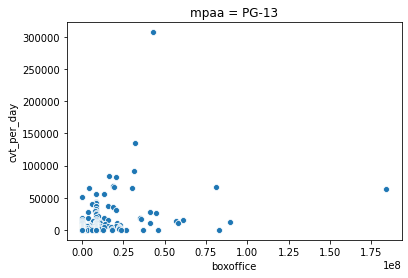

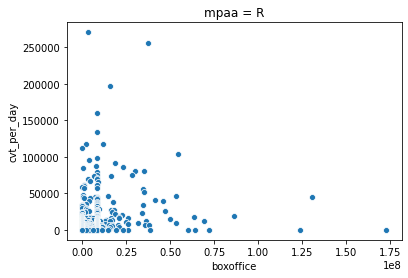

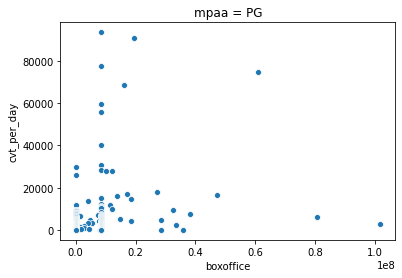

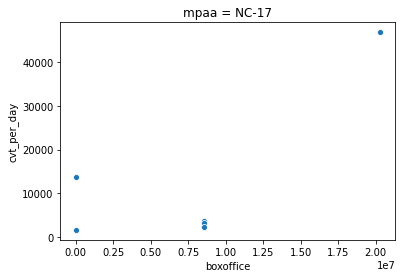

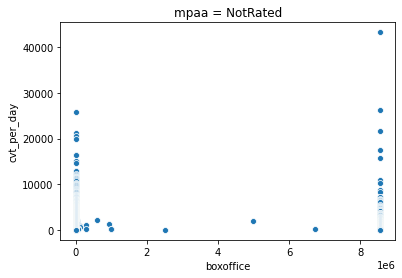

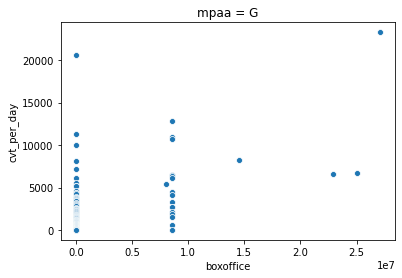

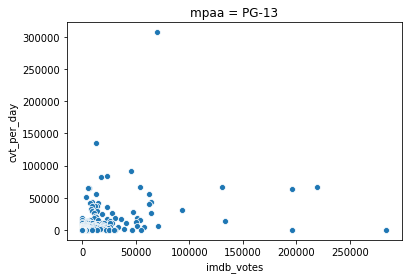

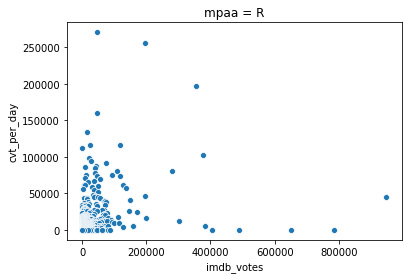

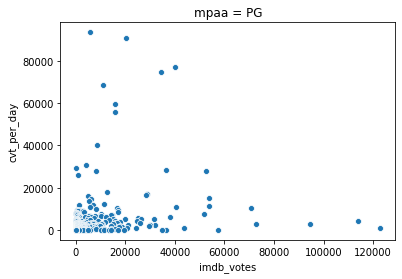

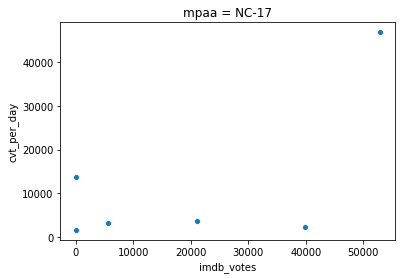

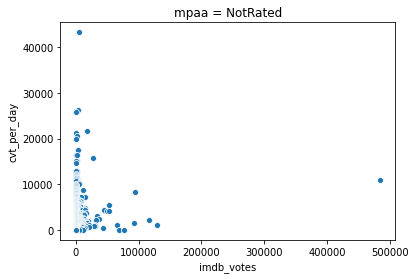

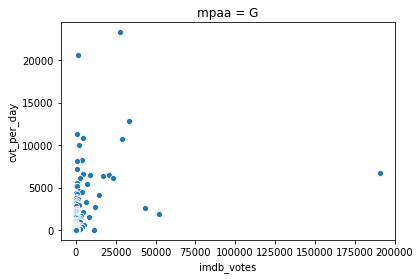

In [92]:
#Scatterplot of Views vs. Box Office by MPAA rating
def cat_scatter(field, x, df):
    category = df[field].unique()
    for c in category: 
        category_df=df[df[field]==c]
        sns.scatterplot(x=x, y='cvt_per_day', data=category_df)
        plt.title(field + ' = ' + c)
        plt.show()
cat_scatter('mpaa', 'boxoffice', AmazonPV_raw)
cat_scatter('mpaa', 'imdb_votes', AmazonPV_raw)


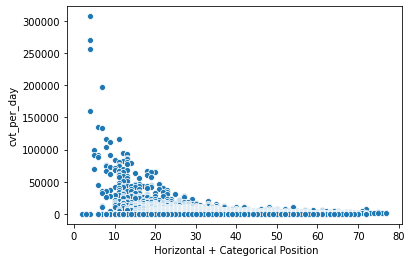

In [4]:
#Views by Position on the Amazon Prime Video page
sum_column = AmazonPV_raw['weighted_horizontal_position'] + AmazonPV_raw['weighted_categorical_position']
sns.scatterplot(x=sum_column, y='cvt_per_day', data=AmazonPV_raw)
plt.xlabel(' Horizontal + Categorical Position')
plt.show()


# Genres

**Videos can have more than one genre in the genress field.  These must be split apart in order to perform further analysis on dividual genres.**

In [11]:
#Splitting genres using explode
AmazonPV_raw['genres2'] = AmazonPV_raw['genres'].str.split(',')
genre_split = AmazonPV_raw.explode('genres2')
genre_split.head()


,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_position,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category,genres2
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.71,Action
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.71,Thriller
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.71,Drama
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.25,Comedy
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.25,Crime


In [11]:
#export file
genre_split.to_csv (r'C:\Users\Kai\export_genre_split.csv', index = False, header=True)

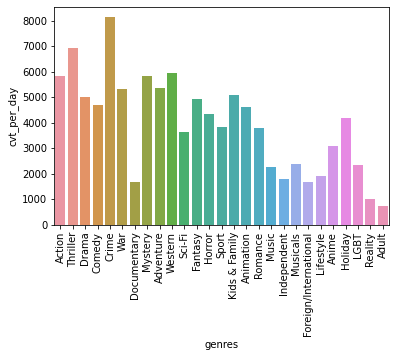

Drama                    1677
Comedy                   1184
Thriller                  879
Horror                    762
Action                    744
Documentary               671
Romance                   591
Crime                     437
Independent               393
Mystery                   375
Sci-Fi                    363
Adventure                 363
Kids & Family             280
Fantasy                   243
Music                     171
Animation                 129
War                       102
Western                   102
Sport                      77
Musicals                   68
Foreign/International      64
Anime                      11
Reality                     9
Lifestyle                   7
Adult                       3
LGBT                        2
Holiday                     1
Name: genres, dtype: int64


In [110]:
#Views by individual genres
sns.barplot(x='genres', y='cvt_per_day', data=genre_split, ci=None)
plt.xticks(rotation=90)
plt.show()
print(genre_split['genres'].value_counts())

**#INSIGHTS:**

**1) Crime genre had the highest cvt_per_day, followed by Thriller.**

**2) Documentary genre had the lowest cvt_per_day, followed by Foreign/International. (excluding genres with less than 11 titles or less)**

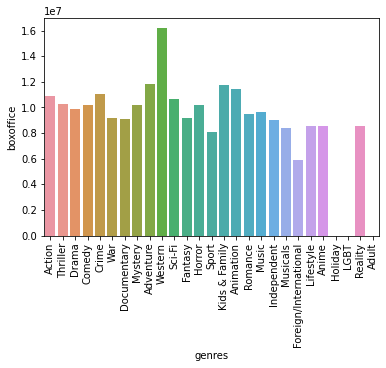

In [64]:
#Box Office by individual genres
sns.barplot(x='genres', y='boxoffice', data=genre_split, ci=None)
plt.xticks(rotation=90)
plt.show()

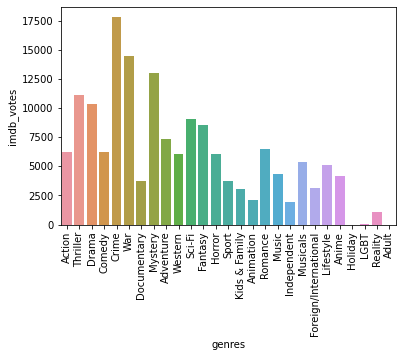

In [63]:
#IMDB votes by individual genres
sns.barplot(x='genres', y='imdb_votes', data=genre_split, ci=None)
plt.xticks(rotation=90)
plt.show()


# Scatterplots by Genre

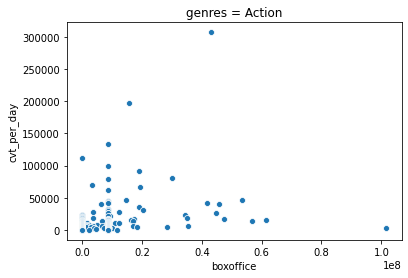

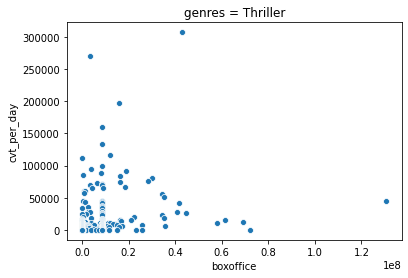

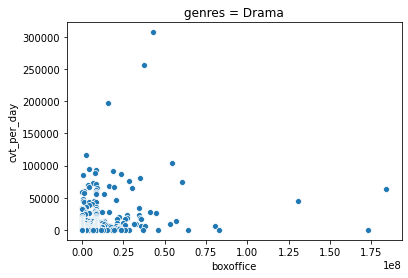

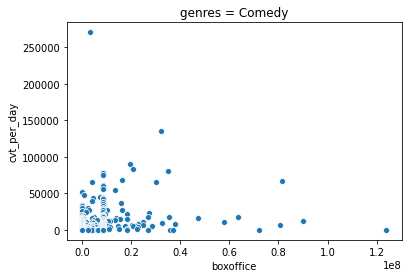

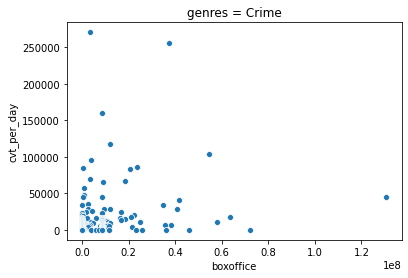

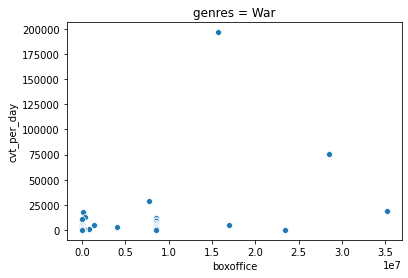

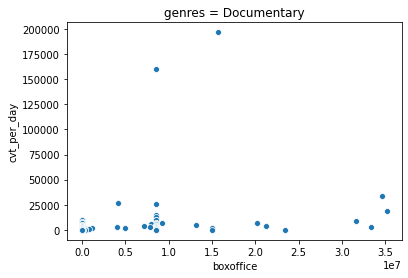

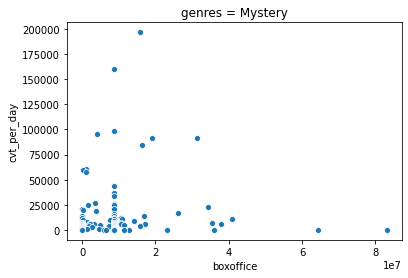

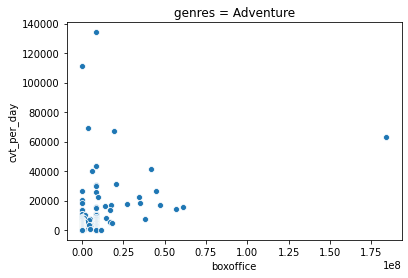

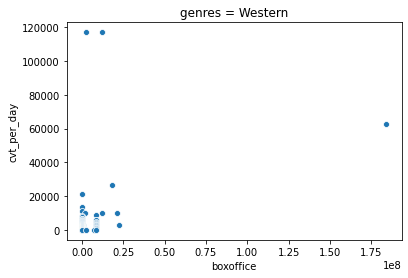

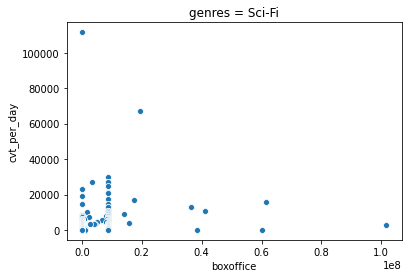

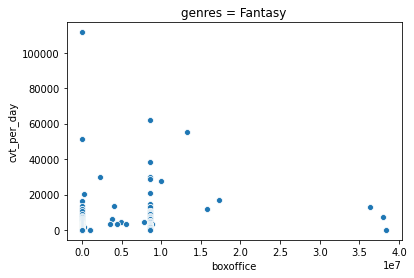

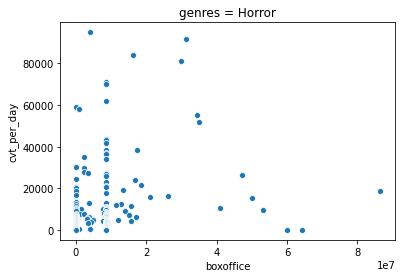

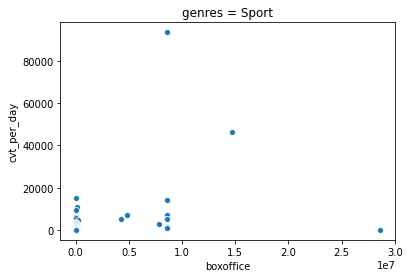

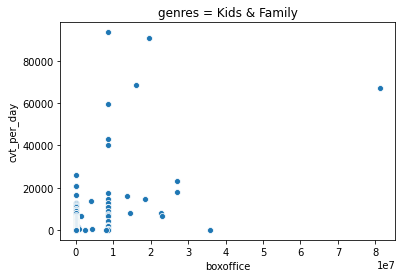

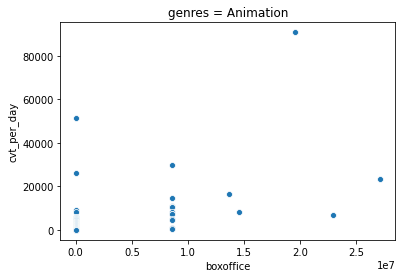

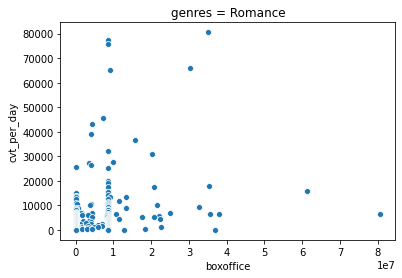

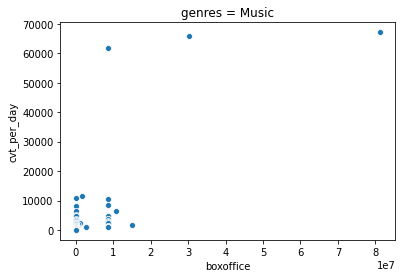

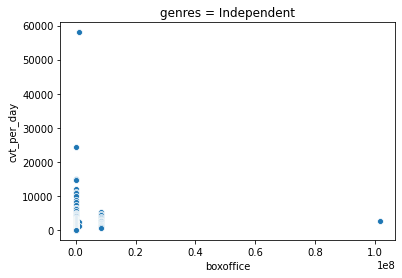

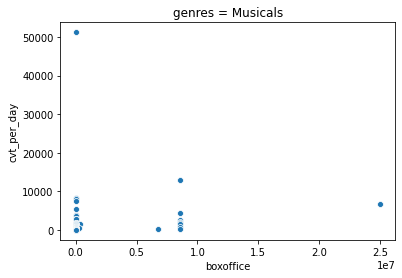

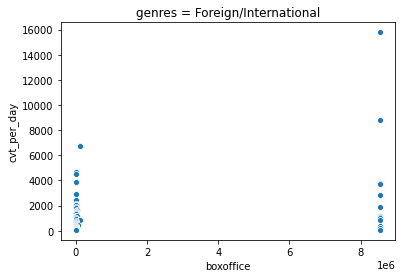

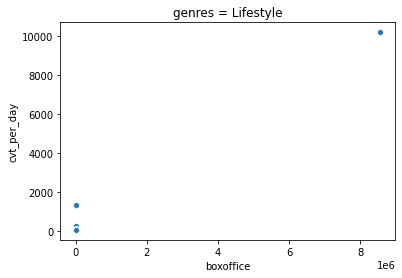

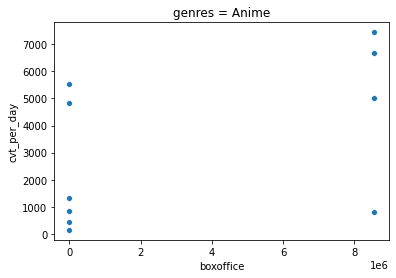

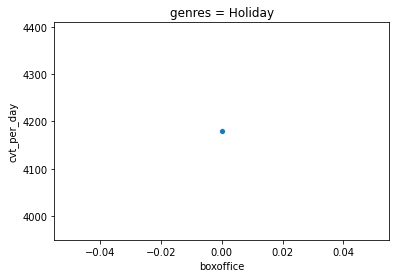

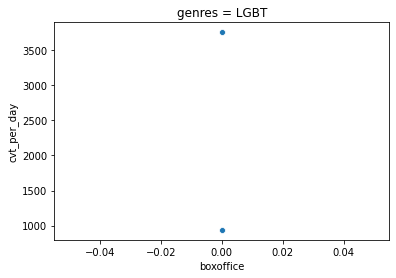

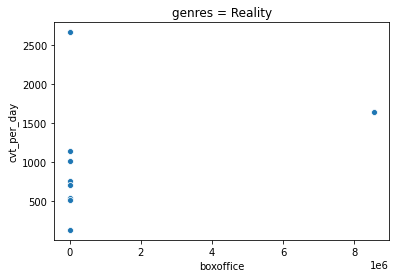

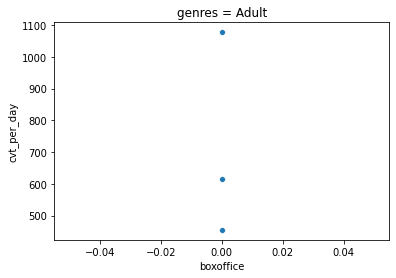

In [101]:
cat_scatter('genres', 'boxoffice', genre_split)


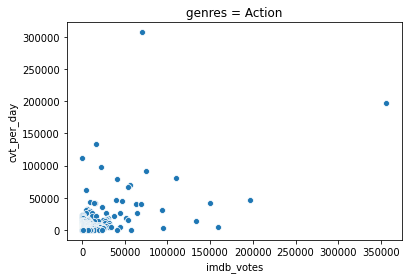

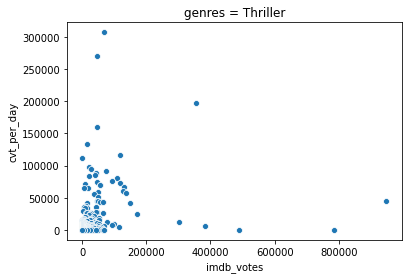

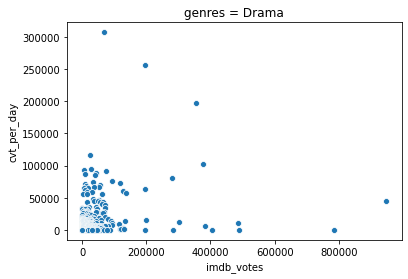

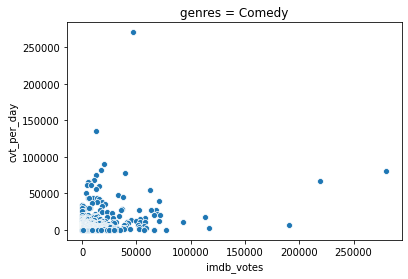

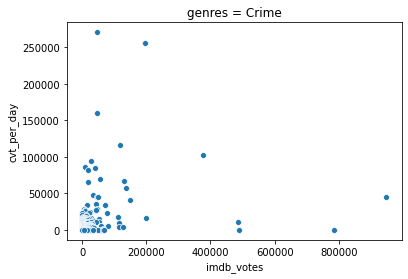

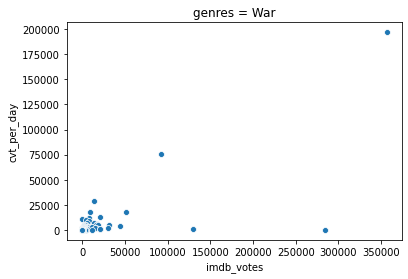

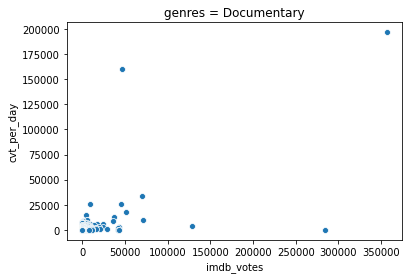

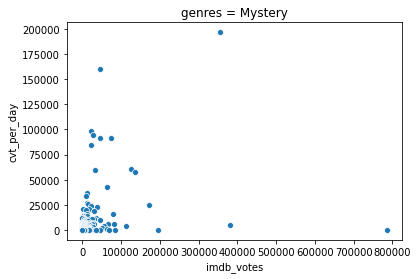

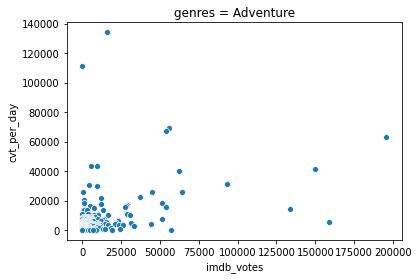

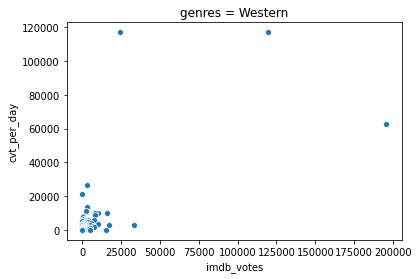

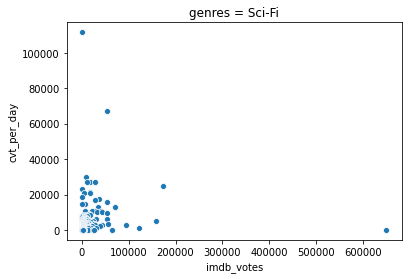

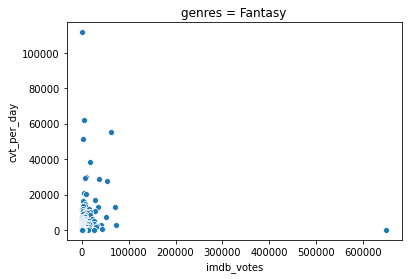

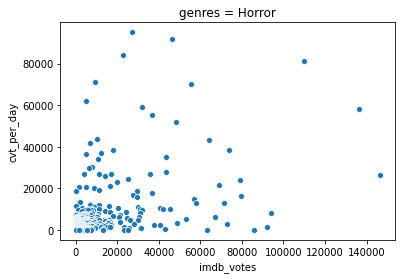

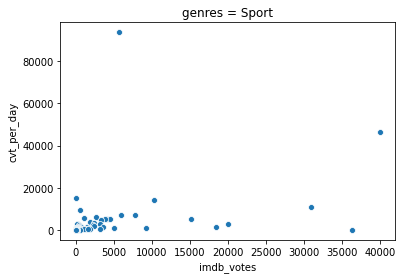

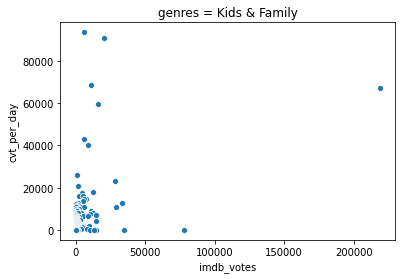

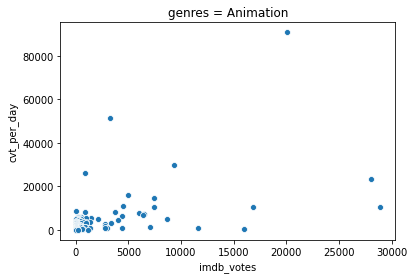

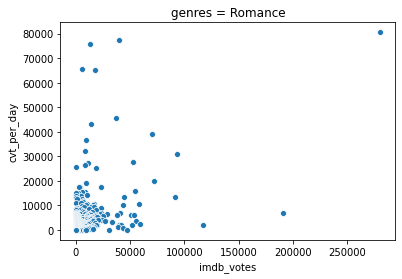

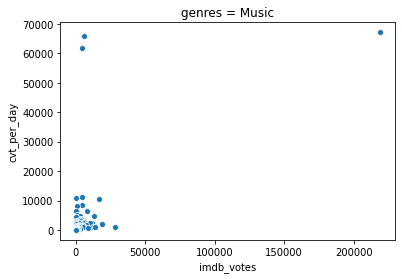

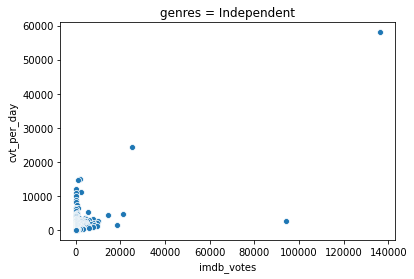

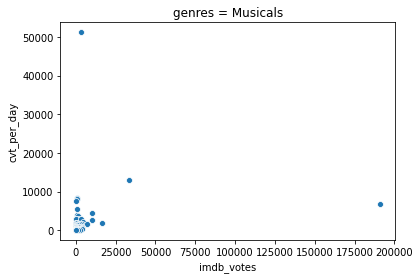

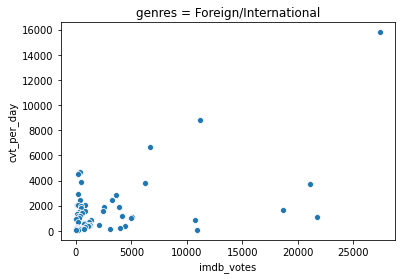

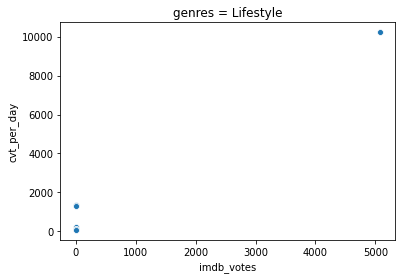

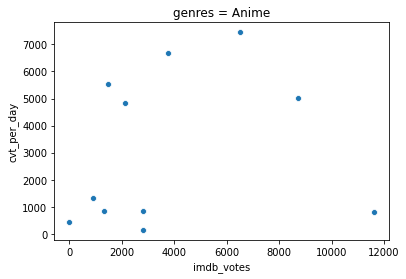

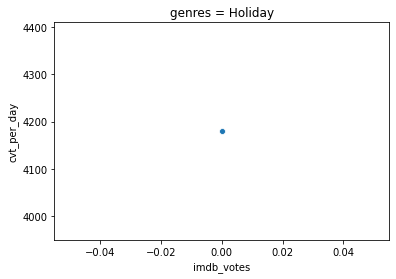

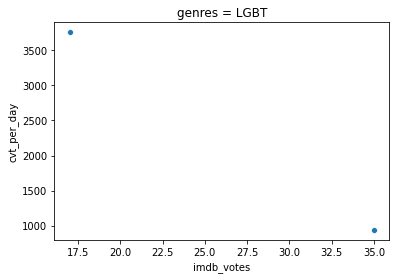

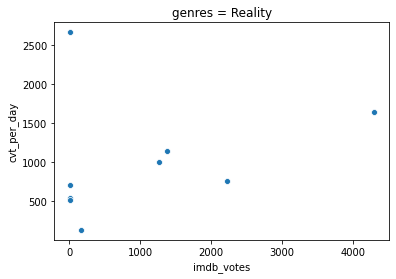

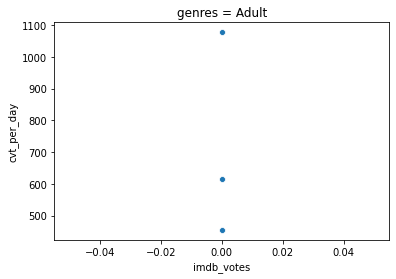

In [97]:
cat_scatter('genres', 'imdb_votes', genre_split)

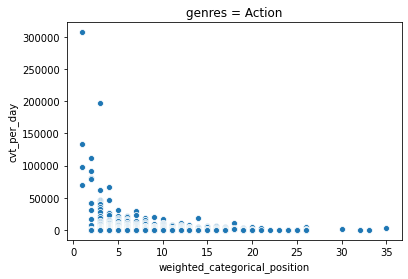

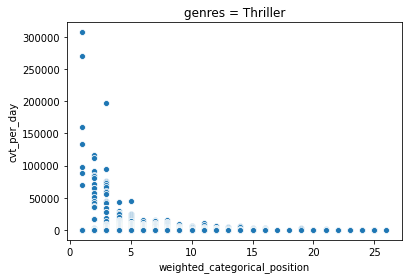

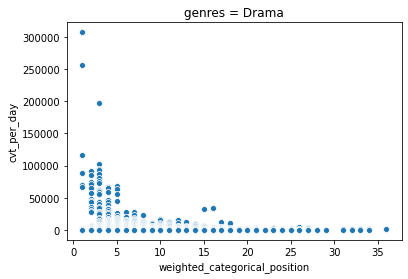

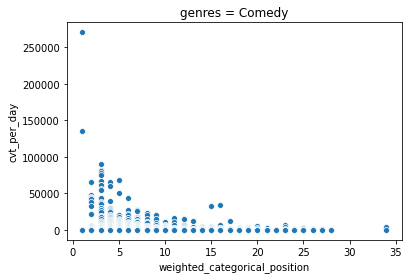

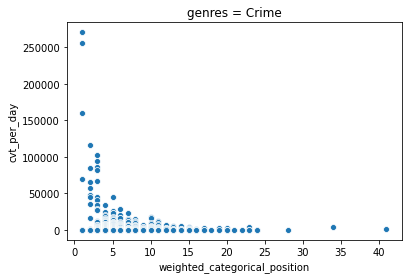

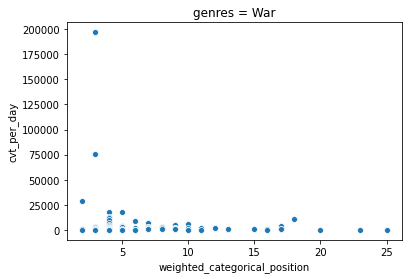

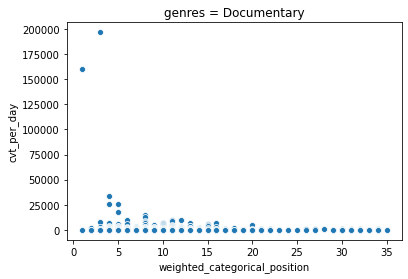

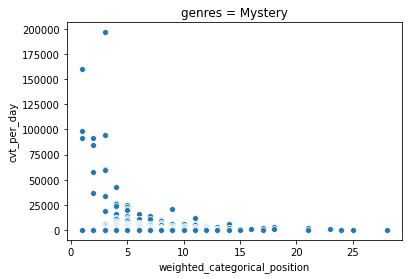

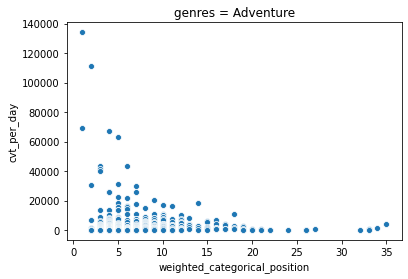

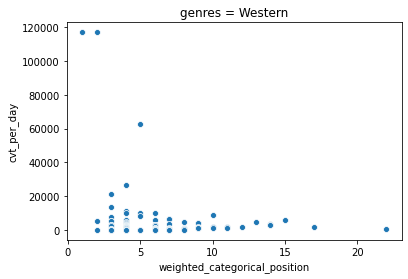

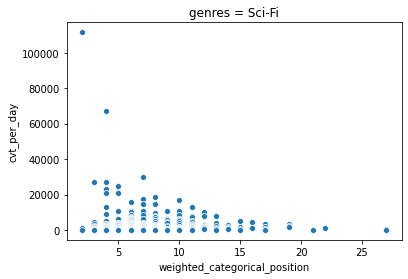

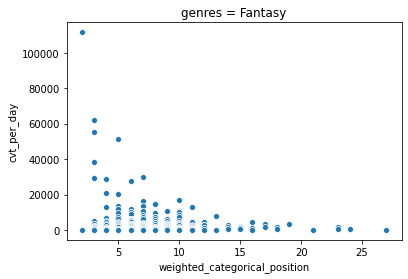

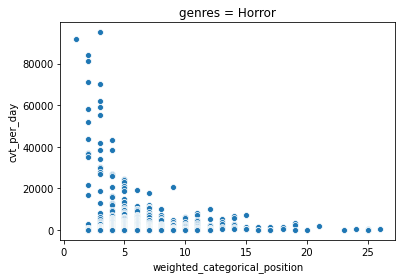

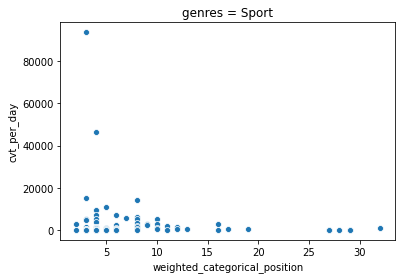

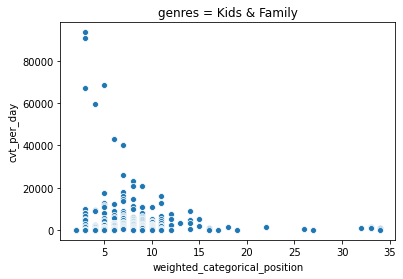

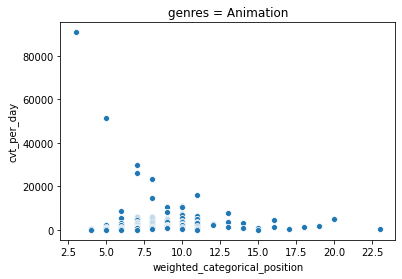

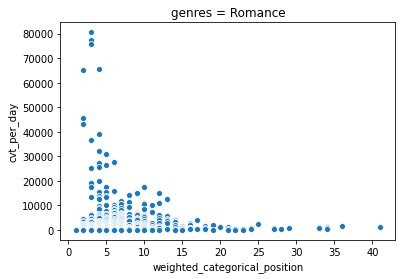

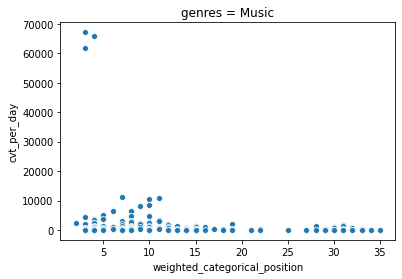

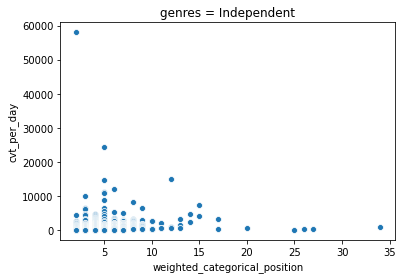

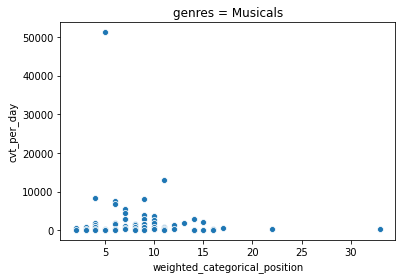

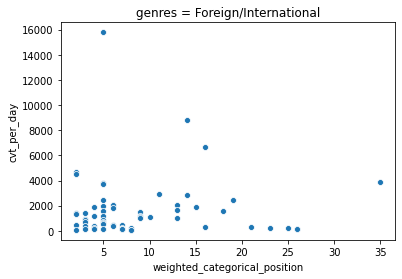

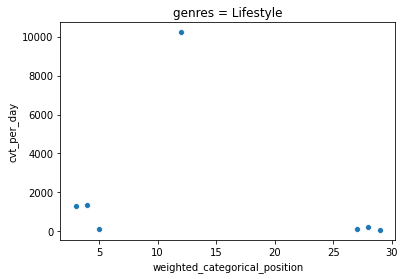

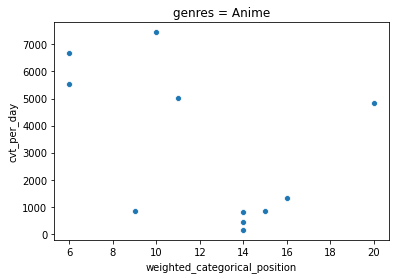

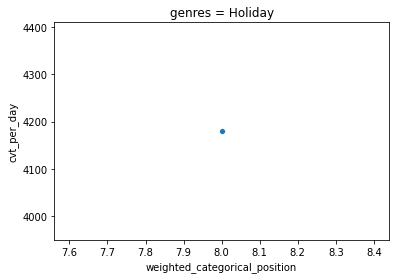

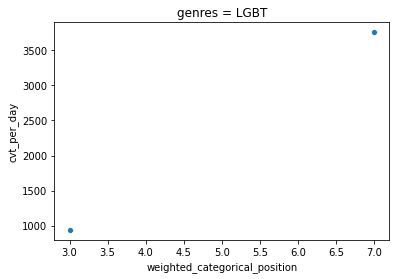

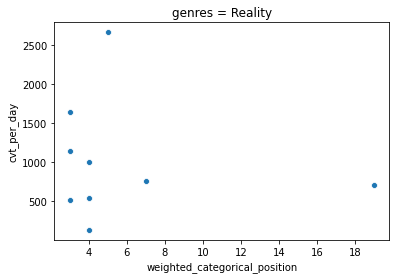

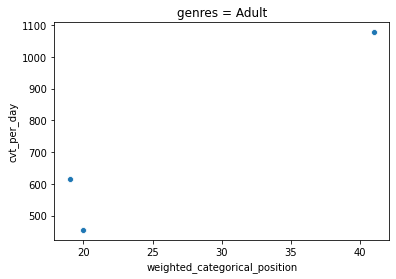

In [95]:
cat_scatter('genres', 'weighted_categorical_position', genre_split)

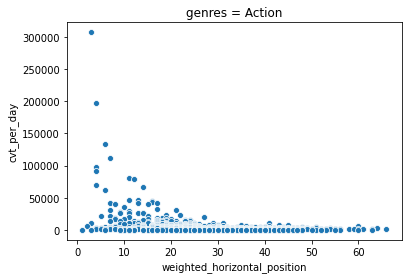

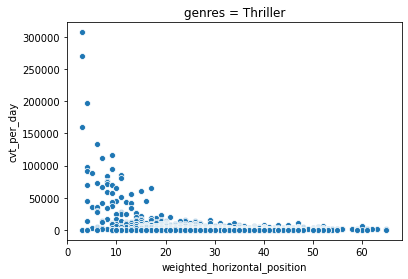

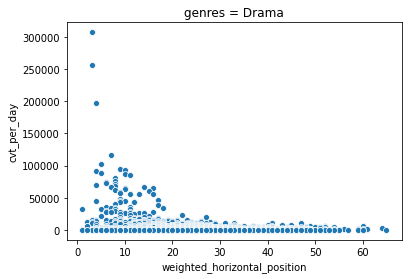

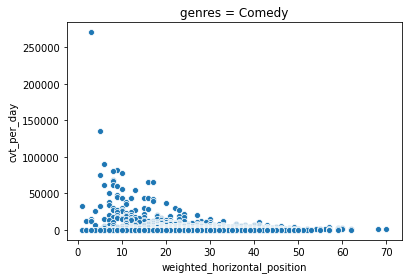

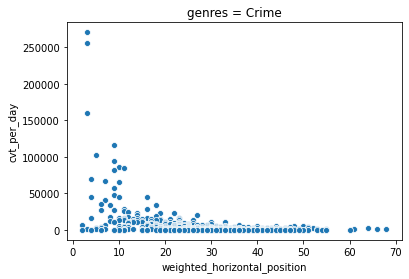

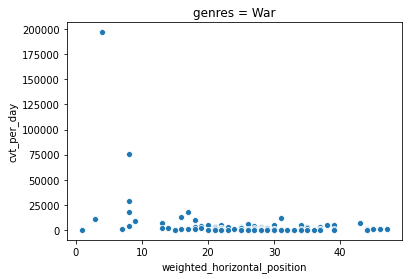

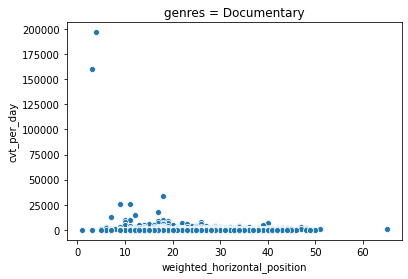

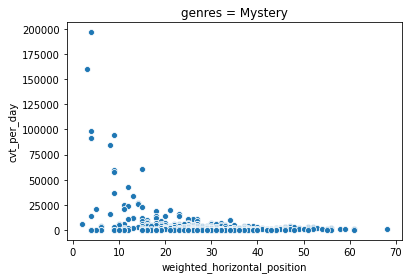

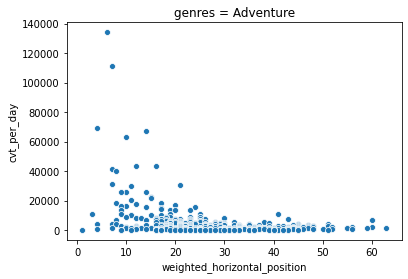

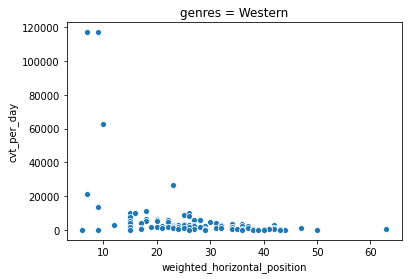

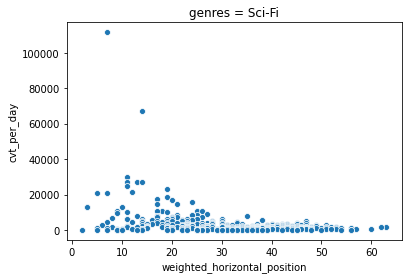

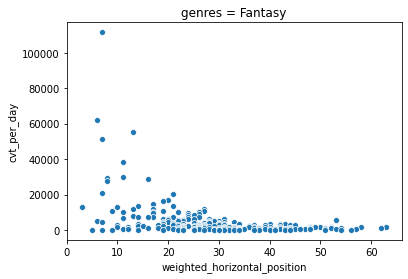

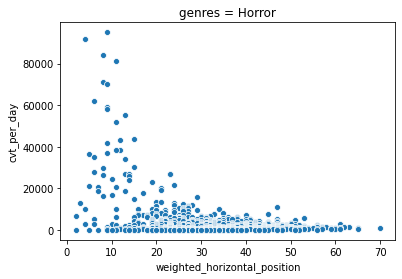

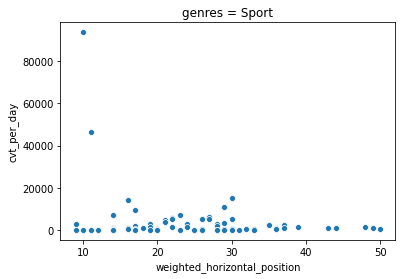

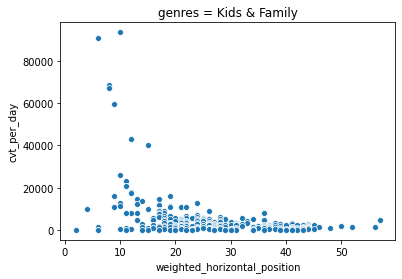

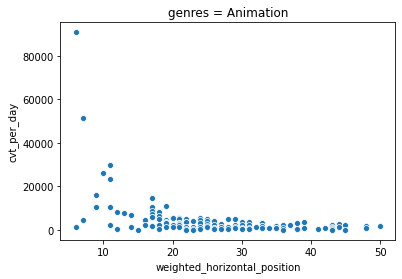

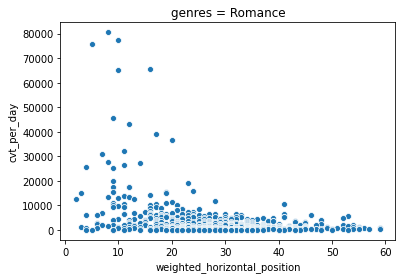

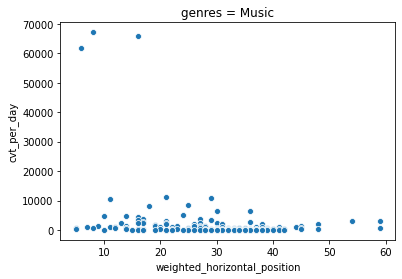

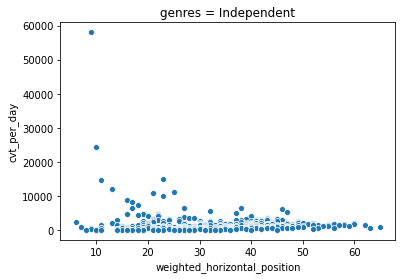

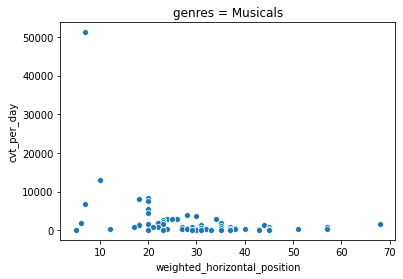

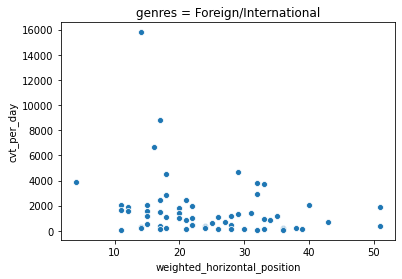

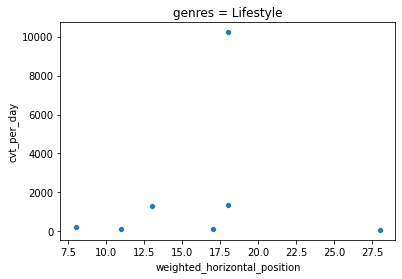

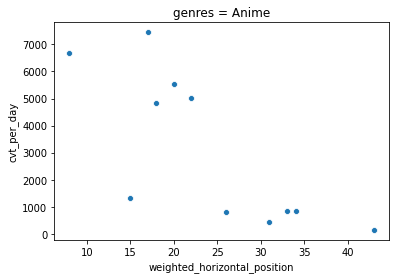

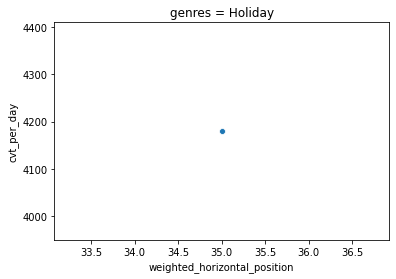

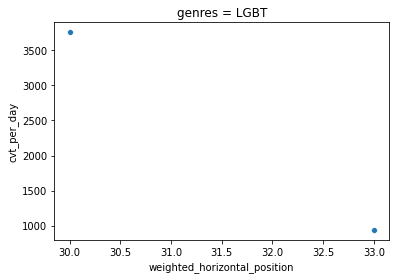

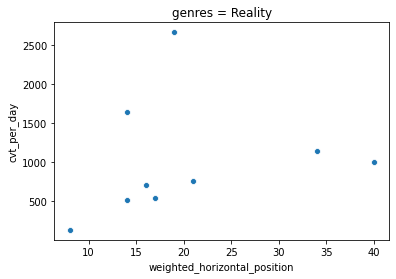

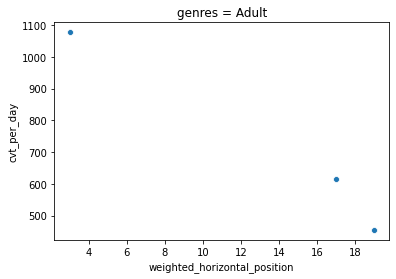

In [96]:
       
cat_scatter('genres', 'weighted_horizontal_position', genre_split)

# Splitting the categorical variables using dummy variables.

In [17]:
genres = AmazonPV_raw['genres'].str.get_dummies(sep',').sum()
print(genres)

genres.sort_values(ascending=False).plot.bar()
plt.show()

SyntaxError: invalid syntax (<ipython-input-17-4bede019c6e7>, line 1)

In [18]:
#Splitting genres using dummy variables
dum_genres = AmazonPV_raw['genres'].str.get_dummies(sep=',')
dum_genres.head()


,Action,Adult,Adventure,Animation,Anime,Comedy,Crime,Documentary,Drama,Fantasy,...,Music,Musicals,Mystery,Reality,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [8]:
#Splitting import_id, mpaa, awards using dummy variables
dum_import_id = AmazonPV_raw['import_id'].str.get_dummies(sep=',')
dum_mpaa = AmazonPV_raw['mpaa'].str.get_dummies(sep=',')
dum_awards = AmazonPV_raw['awards'].str.get_dummies(sep=',')
print(dum_import_id)
print(dum_mpaa)
print(dum_awards)

      lionsgate  mgm  other  paramount
0             1    0      0          0
1             1    0      0          0
2             0    0      1          0
3             1    0      0          0
4             1    0      0          0
...         ...  ...    ...        ...
4221          0    0      1          0
4222          0    0      1          0
4223          0    0      1          0
4224          0    0      1          0
4225          0    0      1          0

[4226 rows x 4 columns]
      G  NC-17  NotRated  PG  PG-13  R
0     0      0         0   0      1  0
1     0      0         0   0      0  1
2     0      0         0   0      0  1
3     0      0         0   0      0  1
4     0      0         0   0      0  1
...  ..    ...       ...  ..    ... ..
4221  0      0         1   0      0  0
4222  0      0         0   0      1  0
4223  0      0         1   0      0  0
4224  0      0         1   0      0  0
4225  0      0         1   0      0  0

[4226 rows x 6 columns]
      BAFTA  G

In [20]:
#Newer movies are more popular than older movies, so release_year will be split and bucketed into ranges. 
#Binning Release Year into 10 buckets
AmazonPV_raw['release_year'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    1916.0
0.1    1974.0
0.2    1991.0
0.3    2001.0
0.4    2006.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2013.0
0.9    2014.0
1.0    2017.0
Name: release_year, dtype: float64

In [21]:
#Convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(AmazonPV_raw['release_year'], bin_year, labels=year_range)
dum_year = pd.get_dummies(year_bin).astype(np.int64)

In [22]:
#New dataframe with dropped categorical variables, added dummy variables
pd.options.display.max_columns = None
AmazonPV_temp = AmazonPV_raw.drop(['import_id','genres','mpaa', 'awards','release_year'], axis=1)
AmazonPV_new = pd.concat([AmazonPV_temp, dum_import_id, dum_genres, dum_mpaa, dum_awards, dum_year], axis=1)
AmazonPV_new.head()


,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_position,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,Action,Adult,Adventure,Animation,Anime,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Holiday,Horror,Independent,Kids & Family,LGBT,Lifestyle,Music,Musicals,Mystery,Reality,Romance,Sci-Fi,Sport,Thriller,War,Western,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.605608,1,3,69614,15000000,42930462,6.5,112.301017,51,1.710000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426375,1,3,46705,15000000,3301046,6.5,94.983250,41,3.250000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867446,1,3,197596,26000000,37397291,7.3,115.763675,58,2.646667,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,308314,196622.720996,3,4,356339,15000000,15700000,7.6,130.703583,94,1.666667,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652064,1,3,46720,27220000,8551228,6.4,105.545533,37,3.066667,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Missing Data

In [23]:
#Change 0 to Nan to identify possible missing data
AmazonPV_raw [['budget','boxoffice','imdb_votes','imdb_rating','metacritic_score','star_category']] = AmazonPV_new [['budget','boxoffice','imdb_votes','imdb_rating','metacritic_score','star_category']].replace(0, np.nan)
print(AmazonPV_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_position     4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       3882 non-null float64
budget                           1772 non-null float64
boxoffice                        1032 non-null float64
imdb_rating                      3882 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 1214 non-null float64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    2380 non-null float64
dtypes: float64(8), int64

In [24]:
AmazonPV_new [['budget','boxoffice','imdb_votes','imdb_rating','metacritic_score','star_category']] = AmazonPV_new [['budget','boxoffice','imdb_votes','imdb_rating','metacritic_score','star_category']].replace(0, np.nan)
print(AmazonPV_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 63 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_position     4226 non-null int64
imdb_votes                       3882 non-null float64
budget                           1772 non-null float64
boxoffice                        1032 non-null float64
imdb_rating                      3882 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 1214 non-null float64
star_category                    2380 non-null float64
lionsgate                        4226 non-null int64
mgm                              4226 non-null int64
other                            4226 non-null int64
paramount                        4226 non-null int64
Action                           4226 non-null int64
Adult                        

# Fill missing data with median value

In [25]:
AmazonPV=AmazonPV_new.copy()
AmazonPV['boxoffice']=AmazonPV['boxoffice'].fillna(AmazonPV['boxoffice'].median())
AmazonPV['metacritic_score']=AmazonPV['metacritic_score'].fillna(AmazonPV['metacritic_score'].median())
AmazonPV['star_category']=AmazonPV['star_category'].fillna(AmazonPV['star_category'].median())
AmazonPV['imdb_votes']=AmazonPV['imdb_votes'].fillna(AmazonPV['imdb_votes'].median())
AmazonPV['imdb_rating']=AmazonPV['imdb_rating'].fillna(AmazonPV['imdb_rating'].median())
AmazonPV['budget']=AmazonPV['budget'].fillna(AmazonPV['budget'].median())
print(AmazonPV.info())
AmazonPV.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 63 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_position     4226 non-null int64
imdb_votes                       4226 non-null float64
budget                           4226 non-null float64
boxoffice                        4226 non-null float64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null float64
star_category                    4226 non-null float64
lionsgate                        4226 non-null int64
mgm                              4226 non-null int64
other                            4226 non-null int64
paramount                        4226 non-null int64
Action                           4226 non-null int64
Adult                        

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_position,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,Action,Adult,Adventure,Animation,Anime,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Holiday,Horror,Independent,Kids & Family,LGBT,Lifestyle,Music,Musicals,Mystery,Reality,Romance,Sci-Fi,Sport,Thriller,War,Western,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.605608,1,3,69614.0,15000000.0,42930462.0,6.5,112.301017,51.0,1.710000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426375,1,3,46705.0,15000000.0,3301046.0,6.5,94.983250,41.0,3.250000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867446,1,3,197596.0,26000000.0,37397291.0,7.3,115.763675,58.0,2.646667,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,308314,196622.720996,3,4,356339.0,15000000.0,15700000.0,7.6,130.703583,94.0,1.666667,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652064,1,3,46720.0,27220000.0,8551228.0,6.4,105.545533,37.0,3.066667,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Regression

In [26]:
#OLS Regression from statsmodel - multivariate regression model 
variables = ['imdb_votes', 'budget','metacritic_score','star_category', 'weighted_categorical_position', 'weighted_horizontal_position', 'imdb_rating', 'duration_in_mins', 'metacritic_score', 'star_category', 'lionsgate', 'mgm', 'other', 'paramount', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Foreign/International', 'Horror', 'Independent', 'Kids & Family', 'Music', 'Musicals', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'G', 'NC-17', 'NotRated', 'PG', 'PG-13', 'R', 'BAFTA', 'Golden Globe', 'Oscar', 'no award', 'other award', '1916-1974', '1974-1991', '1991-2001', '2001-2006', '2006-2008', '2008-2010', '2010-2012', '2012-2013', '2013-2014', '2014-2017']
y = AmazonPV ['cvt_per_day']
X = AmazonPV [variables]
X = sm.add_constant(X)

OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

C:\Users\Kai\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cvt_per_day   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     32.16
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          1.12e-257
Time:                        18:50:27   Log-Likelihood:                -45339.
No. Observations:                4226   AIC:                         9.078e+04
Df Residuals:                    4174   BIC:                         9.111e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          6877.3269   5130.377      1.341      0.180   -3180.944    1.69e+04
imdb_votes                        0.0741      0.006     12.045      0.000       0.062       0.086
budget                            0.0003   2.91e-05      9.354      0.000       0.000       0.000
metacritic_score                -40.6534     12.610     -3.224      0.001     -65.376     -15.931
star_category                  1296.0307    205.920      6.294      0.000     892.317    1699.744
weighted_categorical_position  -190.9177     30.395     -6.281      0.000    -250.509    -131.327
weighted_horizontal_position   -239.3343     15.974    -14.983      0.000    -270.652    -208.016
imdb_rating                    -214.6037    157.210     -1.365      0.172    -522.820      93.612
duration_in_mins                 12.5318      9.906      1.265      0.206      -6.890      31.954
metacritic_score                -40.6534     12.610     -3.224      0.001     -65.376     -15.931
star_category                  1296.0307    205.920      6.294      0.000     892.317    1699.744
lionsgate                      6195.8864   1342.128      4.616      0.000    3564.600    8827.173
mgm                            -368.9013   1384.197     -0.267      0.790   -3082.665    2344.862
other                          -712.1523   1331.871     -0.535      0.593   -3323.328    1899.024
paramount                      1762.4941   1531.626      1.151      0.250   -1240.309    4765.297
Action                          798.2721    560.017      1.425      0.154    -299.660    1896.204
Adventure                      -696.7260    706.085     -0.987      0.324   -2081.029     687.577
Animation                      -849.1452   1154.084     -0.736      0.462   -3111.764    1413.474
Comedy                          604.9435    441.813      1.369      0.171    -261.245    1471.132
Crime                          1565.3931    613.328      2.552      0.011     362.943    2767.843
Documentary                    -612.3278    596.391     -1.027      0.305   -1781.573     556.917
Drama                          -376.0780    423.526     -0.888      0.375   -1206.415     454.259
Fantasy                        1023.5486    785.531      1.303      0.193    -516.510    2563.607
Foreign/International         -2418.4031   1428.645     -1.693      0.091   -5219.308     382.502
Horror                          444.7206    547.670      0.812      0.417    -629.005    1518.446
Independent                    -369.9007    644.530     -0.574      0.566   -1633.522     893.721
Kids & Family                  1782.2542    798.896      2.231      0.026     215.993    3348.515
Music                           932.7802    917.040      1.017      0.309    -865.106    2730.667
Musicals                        868.8032   14

**#Based on the regression analyis, the following variables had p-value < 0.05**

'imdb_votes', 'budget','metacritic_score','star_category', 'weighted_categorical_position', 'weighted_horizontal_position','lionsgate','Crime','Kids & Family','Thriller','Golden Globe'

# Model Training

In [28]:
#Splitting the dataset into the Training and Test dataset
import sklearn as sl

from sklearn.model_selection import train_test_split
variables = ['imdb_votes', 'budget','metacritic_score','star_category', 'weighted_categorical_position', 'weighted_horizontal_position','lionsgate','Crime','Kids & Family','Thriller','Golden Globe'] 
y = AmazonPV['cvt_per_day']
X = AmazonPV[variables]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Linear Regression

In [29]:
#Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_predict=reg.predict(X_test)
r2_reg=r2_score(y_test, y_predict)

MSE_reg=mean_squared_error(y_test,y_predict)
RMSE_reg=np.sqrt(MSE_reg)
print ('lin reg score: ', r2_reg)
print ('Mean square error of lin reg: ', MSE_reg)
print ('Root mean squared error of lin reg:', RMSE_reg)

lin reg score:  0.2558848115215483
Mean square error of lin reg:  129965846.25079075
Root mean squared error of lin reg: 11400.256411624729


In [31]:
regr


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=2, max_features='sqrt', random_state=0)
regr.fit(X_train, y_train)
predict_y=regr.predict(X_test)
r2_regr=r2_score(y_test, predict_y)

MSE_regr=mean_squared_error(y_test,predict_y)
RMSE_regr=np.sqrt(MSE_regr)
print ('Regr score: ', r2_regr)
print ('Mean square error of regr: ', MSE_regr)
print ('Root mean squared error of regr:', RMSE_regr)



Regr score:  0.6602644321827356
Mean square error of regr:  59337615.00440371
Root mean squared error of regr: 7703.091262889446


# Model Comparison

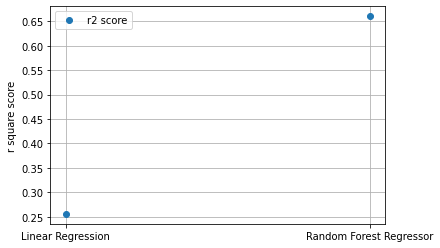

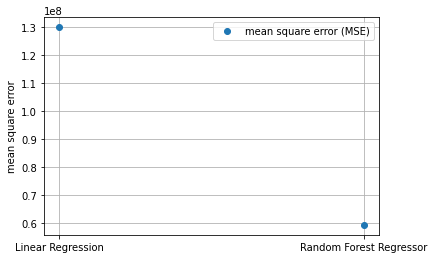

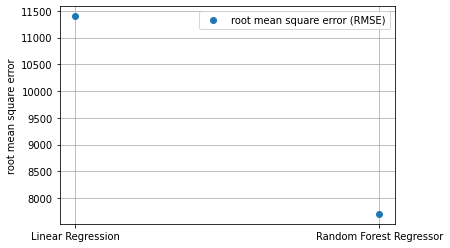

In [51]:
model_lst = ['Linear Regression', 'Random Forest Regressor']
score_lst = [r2_reg, r2_regr]
MSE_lst =  [MSE_reg, MSE_regr]
RMSE_lst =  [RMSE_reg, RMSE_regr]


plt.plot(model_lst, score_lst, "o")
plt.legend(['r2 score'])
plt.ylabel('r square score')
plt.grid(True)
plt.show()

plt.plot(model_lst, MSE_lst, "o")
plt.legend(['mean square error (MSE)'])
plt.ylabel('mean square error')
plt.grid(True)
plt.show()

plt.plot(model_lst, RMSE_lst, "o")
plt.legend(['root mean square error (RMSE)'])
plt.ylabel('root mean square error')
plt.grid(True)
plt.show()

**#INSIGHTS**

**#According to R square, MSE, and RMSE, the Random Forest Regressor has the best performance.**

### Feature Importance

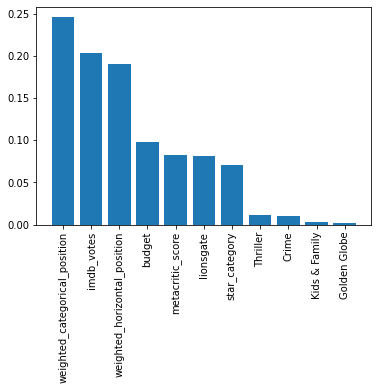

In [52]:
importances = regr.feature_importances_
feature_name = X_train.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()

#print("Most Important Feature ranking:")

#for f in range(X.shape[1]):
    #print(f + 1, indices[f], importances[indices[f]])

**##INSIGHTS**

**The most important feature is the categorical position.  The higher on the page, the more views.**

**The second most important feature is imdb_votes.  The volume of votes is an indication of popularity. People most likely only votes on movies they've seen.  The higher the votes on imdb, the more people have seen the movie. Popular movies get more views.**

**The horizontal position  is the third most important features. Visibility on the page goes down as you scroll right.**

**The fourth most important feature is budget, which indicates the quality and scale of the production.  Movies with bigger budget are targeting bigger audience.**

In [ ]:
a